In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers

import os, zipfile
import matplotlib.pyplot as plt


In [4]:
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_path = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", origin=url)

# Extraindo manualmente
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(os.path.dirname(zip_path))

# Ajustando caminhos
base_dir = os.path.join(os.path.dirname(zip_path), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

print("Diretórios extraídos:")
print("Train:", train_dir)
print("Validation:", validation_dir)

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Diretórios extraídos:
Train: /root/.keras/datasets/cats_and_dogs_filtered/train
Validation: /root/.keras/datasets/cats_and_dogs_filtered/validation


In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
base_model = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(150, 150, 3))

# Congelar pesos da base
for layer in base_model.layers:
    layer.trainable = False

# Adicionar camadas personalizadas
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 446ms/step - accuracy: 0.6167 - loss: 0.6715 - val_accuracy: 0.8290 - val_loss: 0.3852
Epoch 2/10
 1/50 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.8125 - loss: 0.4421

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.7782 - loss: 0.4853 - val_accuracy: 0.8500 - val_loss: 0.3591
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 283ms/step - accuracy: 0.7823 - loss: 0.4713 - val_accuracy: 0.8640 - val_loss: 0.3199
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.7901 - loss: 0.4259 - val_accuracy: 0.8340 - val_loss: 0.3444
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 288ms/step - accuracy: 0.8077 - loss: 0.4176 - val_accuracy: 0.8480 - val_loss: 0.3262
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.8223 - loss: 0.3904 - val_accuracy: 0.8750 - val_loss: 0.2923
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 319ms/step - accuracy: 0.8395 - loss: 0.3644 - val_accuracy: 0.8680 - val_loss: 0.2973
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.7997 - loss: 0.4132 - val_accuracy: 0.8690 - val_loss: 0.2962
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 329ms/step - accuracy: 0.8452 - loss: 0.3387 - val_accuracy: 0.8840 - 

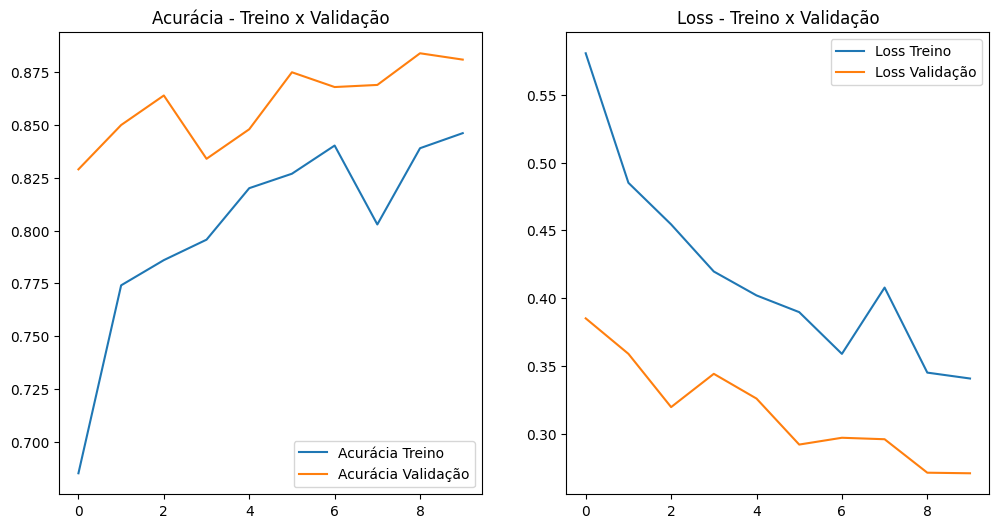

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia Treino')
plt.plot(epochs_range, val_acc, label='Acurácia Validação')
plt.legend(loc='lower right')
plt.title('Acurácia - Treino x Validação')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Loss Treino')
plt.plot(epochs_range, val_loss, label='Loss Validação')
plt.legend(loc='upper right')
plt.title('Loss - Treino x Validação')
plt.show()

In [12]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)[0][0]
    if prediction > 0.5:
        print(f"É um CACHORRO 🐶 (confiança {prediction:.2f})")
    else:
        print(f"É um GATO 🐱 (confiança {1-prediction:.2f})")
predict_image('/mel.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
É um CACHORRO 🐶 (confiança 0.98)
